In [1]:
!pip install tweet-preprocessor
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from preprocessor.api import clean


In [2]:
#load data
sotu_retweets = pd.read_csv('https://assets.datacamp.com/production/repositories/2161/datasets/51e79668580cdb86969c2c625172eaed2ded684a/sotu2018-rt.csv')

In [4]:
sotu_retweets.head(2)


,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,...,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries
0,NaN,NaN,Wed Jan 31 03:51:59 +0000 2018,NaN,0,False,low,NaN,958548390052179968,958548390052179968,...,False,A PERFECT ANALOGY:\n\nSeveral democrats are br...,A PERFECT ANALOGY:\n\nSeveral democrats are br...,ScottPresler,"<a href=""http://twitter.com/download/iphone"" r...",RT @ScottPresler: A PERFECT ANALOGY:\n\nSevera...,1517370719813,False,MatthewJAld,NaN
1,NaN,NaN,Wed Jan 31 03:55:33 +0000 2018,NaN,0,False,low,NaN,958549287285215232,958549287285215232,...,False,NaN,President Trump invited families of Americans ...,RealJack,"<a href=""http://twitter.com/download/android"" ...",RT @RealJack: President Trump invited families...,1517370933730,False,broussard_sr,NaN


In [5]:
#restrict data frame to rows where either 'user-screen_name' or 'retweeted_status-user-screen_name' is 'FoxNews'
sotu_retweets_Fox = sotu_retweets[(sotu_retweets['user-screen_name'] == 'FoxNews') | (sotu_retweets['retweeted_status-user-screen_name'] == 'FoxNews')]

In [6]:
sotu_retweets_Fox.shape

(129, 37)

In [11]:
foxnews_retweets = sotu_retweets_Fox[sotu_retweets_Fox['user-screen_name'] == 'FoxNews'].shape[0]
other_retweets = sotu_retweets_Fox[sotu_retweets_Fox['user-screen_name'] != 'FoxNews'].shape[0]

print("Number of times FoxNews was retweeted:", foxnews_retweets)
print("Number of times FoxNews retweeted other users:", other_retweets)


Number of times FoxNews was retweeted: 1
Number of times FoxNews retweeted other users: 128


In [13]:
#PART A
G_rt = nx.from_pandas_edgelist( sotu_retweets_Fox, source ='retweeted_status-user-screen_name', target = 'user-screen_name', create_using = nx.DiGraph())

The provided code uses the NetworkX library to create a directed graph from a pandas DataFrame containing retweet data. It converts the DataFrame into a graph representation where each row represents an edge between a source user (retweeted) and a target user (retweeter). This graph can be used for various network analysis techniques, such as calculating centrality measures, identifying influential users, performing community detection, or visualizing the retweet dynamics. NetworkX provides a range of functions and algorithms to analyze and visualize the graph structure.

In [15]:
num_nodes = G_rt.number_of_nodes()
num_edges = G_rt.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)


Number of nodes: 130
Number of edges: 129


128 retweeted + FoxNews +FoxBusiness = 130 in total

The number_of_nodes() function returns the total number of nodes in the graph G_rt, and the number_of_edges() function returns the total number of edges in the graph. These numbers are calculated by NetworkX based on the provided edge list DataFrame sotu_retweets_Fox, where each row represents an edge between a source user and a target user.

In [16]:
degree = G_rt.degree('FoxNews')
print("Degree of 'FoxNews':", degree)


Degree of 'FoxNews': 129


129: 128 coming out (retweet) + 1 coming out (FoxNews retweeted FoxBusiness)

The degree of a node in a graph represents the number of edges connected to that node. In the context of the retweet graph, the degree of the node 'FoxNews' indicates the number of times 'FoxNews' has been retweeted by other users or has retweeted other users.

By calculating the degree of the 'FoxNews' node, you can obtain the count of retweets involving 'FoxNews' and get a measure of its popularity or engagement within the retweet network.





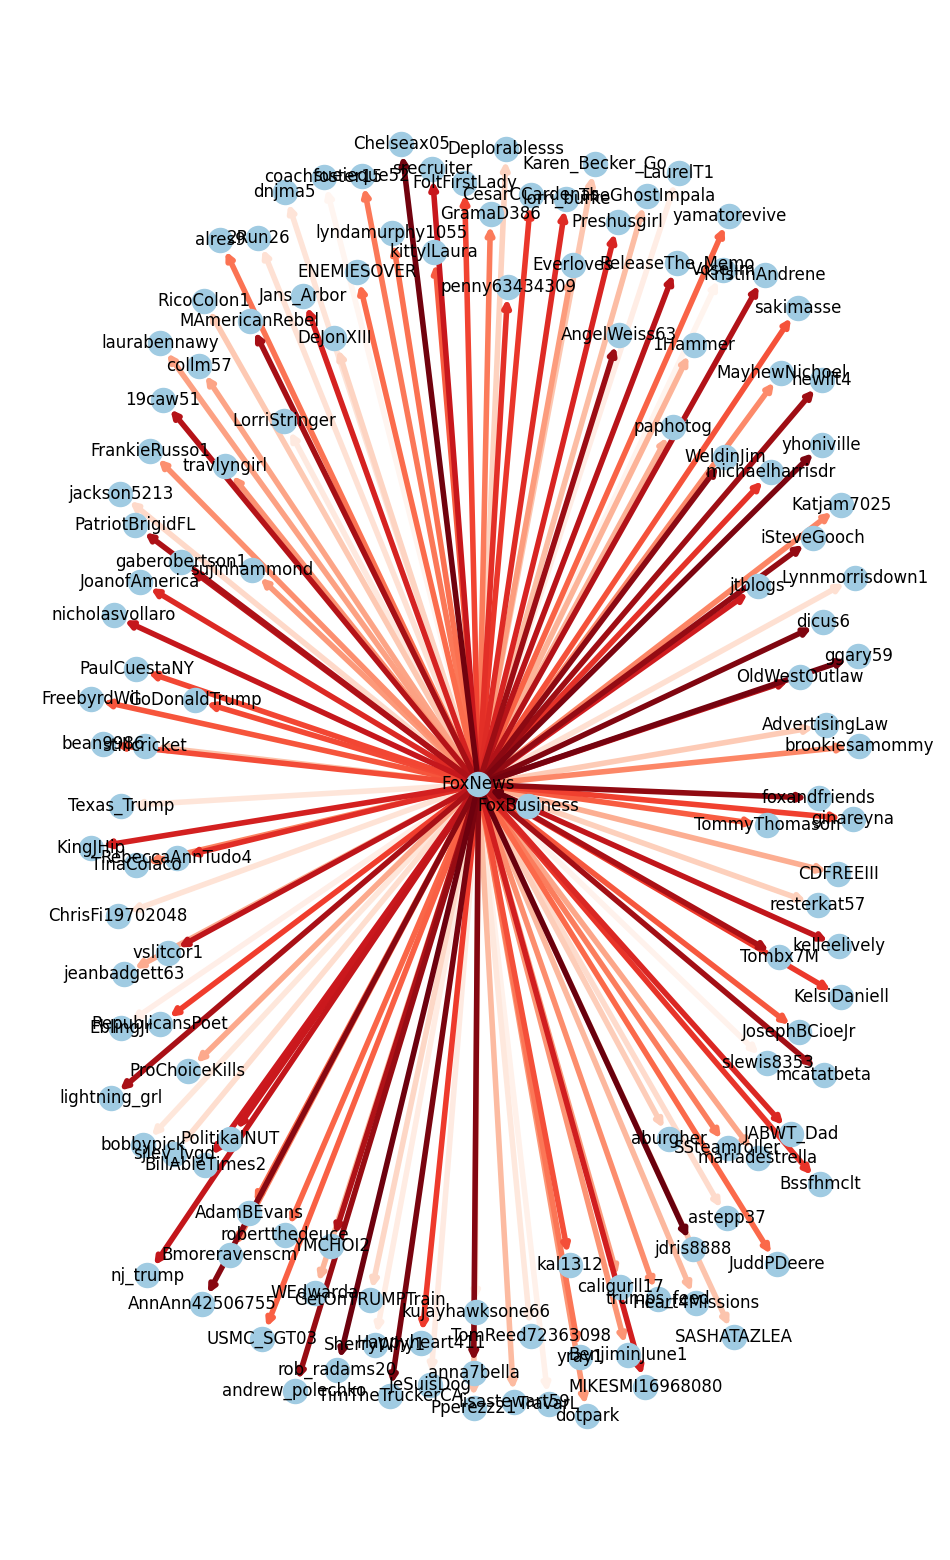

In [17]:
#PART B

plt.figure(figsize=(12,20)) 
pos = nx.spring_layout(G_rt,k=0.20,iterations=20)
colors = range(129)
nx.draw_networkx(G_rt,pos,arrows=True, node_color='#A0CBE2', 
edge_color=colors, width=4, edge_cmap=plt.cm.Reds, with_labels=True)
plt.axis('off')
plt.show()



The provided code is using the matplotlib and NetworkX libraries to visualize the retweet graph G_rt. Let's break down what each line does:

plt.figure(figsize=(12,20)): This line creates a new figure with a specific size (width=12, height=20) for the plot.

pos = nx.spring_layout(G_rt,k=0.20,iterations=20): This line uses the spring layout algorithm provided by NetworkX to determine the positions of the nodes in the graph G_rt. The k parameter controls the distance between the nodes, and iterations specifies the number of iterations for the layout algorithm to converge.

colors = range(129): This line generates a sequence of numbers from 0 to 128 and assigns it to the variable colors. It is likely used to assign different colors to the edges based on their index or some other property.

nx.draw_networkx(G_rt,pos,arrows=True, node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=plt.cm.Reds, with_labels=True): This line draws the retweet graph G_rt using the positions specified by pos. It includes arrows on the edges, sets the node color to '#A0CBE2', assigns different colors to the edges based on the colors sequence, sets the edge width to 4, uses the Red colormap for the edge colors, and displays labels for the nodes.

plt.axis('off'): This line turns off the axis labels and ticks.

plt.show(): This line displays the plot.

The resulting plot visualizes the retweet graph G_rt, where nodes represent users and edges represent retweet relationships. The plot displays the nodes with labels and the edges with varying colors and thickness. The specific color assignment may not directly match the result from question 4 as it is based on the colors sequence, but the overall structure and connectivity of the graph can be observed from the visualization.






In [18]:
#PART C

top 5 users who retweeted: numbers if cetrality are normalized so they can be compared